## Merck FEP+ dataset visualisation

In [16]:
import os
import sys
import pickle
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error
import seaborn as sns
from matplotlib import pyplot as plt

In [17]:
def getDirNames(path):
    return [name for name in os.listdir(path) if os.path.isdir(os.path.join(path, name))]

In [18]:
def removeNaN(df):
    df = df.dropna(axis=1, how='all')
    return df.dropna(subset='Ligand')

In [19]:
data = pd.read_csv('../data/all_ligands_data.csv')
data.set_index('Unnamed: 0', inplace=True)

In [20]:
data

,target,target_loc,ligand,ligand_loc,Exp. dG,Pred. dG,Pred. Error
Unnamed: 0,,,,,,,
pfkfb3_43,pfkfb3,../data/pfkfb3/6hvi_prepared.pdb,43,../data/pfkfb3/pfkfb3_ligand_43.pdb,-8.00,-8.82,0.11
pfkfb3_30,pfkfb3,../data/pfkfb3/6hvi_prepared.pdb,30,../data/pfkfb3/pfkfb3_ligand_30.pdb,-9.20,-9.41,0.10
pfkfb3_65,pfkfb3,../data/pfkfb3/6hvi_prepared.pdb,65,../data/pfkfb3/pfkfb3_ligand_65.pdb,-9.49,-9.34,0.09
pfkfb3_49,pfkfb3,../data/pfkfb3/6hvi_prepared.pdb,49,../data/pfkfb3/pfkfb3_ligand_49.pdb,-7.93,-6.68,0.10
pfkfb3_24,pfkfb3,../data/pfkfb3/6hvi_prepared.pdb,24,../data/pfkfb3/pfkfb3_ligand_24.pdb,-8.87,-9.79,0.11
...,...,...,...,...,...,...,...
eg5_CHEMBL1093088,eg5,../data/eg5/3l9h_prepared.pdb,CHEMBL1093088,../data/eg5/eg5_ligand_CHEMBL1093088.pdb,-11.22,-9.65,0.21
eg5_CHEMBL1084676,eg5,../data/eg5/3l9h_prepared.pdb,CHEMBL1084676,../data/eg5/eg5_ligand_CHEMBL1084676.pdb,-10.71,-10.60,0.27
eg5_CHEMBL1084935,eg5,../data/eg5/3l9h_prepared.pdb,CHEMBL1084935,../data/eg5/eg5_ligand_CHEMBL1084935.pdb,-10.53,-9.39,0.23


In [60]:
def regplot_grouped(data, true_col, pred_col, group_col, pred_err_col=None, outpath=None):

    pr = stats.pearsonr(data[true_col], data[pred_col])[0]
    sr = stats.spearmanr(data[true_col], data[pred_col])[0]
    rmse = np.sqrt(mean_squared_error(data[true_col], data[pred_col]))

    #lims = [min(data[true_col].min(), data[pred_col].min())-0.5, max(data[true_col].max(), data[pred_col].max())+0.5]
    lims = [-14.5, -3.5]

    g = sns.jointplot(data=data, 
                       x=true_col,
                       y=pred_col, 
                       hue=group_col, 
                       xlim=lims,
                       ylim=lims)
    
    g.ax_joint.set_xlabel(xlabel='Exp. $\Delta$G (kcal/mol)')
    g.ax_joint.set_ylabel(ylabel='Pred. $\Delta$G (kcal/mol)')

    if pred_err_col is not None:
        g.ax_joint.errorbar(data[true_col], data[pred_col], yerr=data[pred_err_col], color='grey', fmt="none", alpha=0.25)

    g.ax_joint.plot(lims, lims, linestyle='--', color='black', alpha=0.5)
    
    g.ax_joint.text(
        0.7,
        0.05,
        f"RMSE = {rmse:.2f} | Pearson's $r$ = {pr:.2f}",
        horizontalalignment="center",
        verticalalignment="center",
        bbox={"boxstyle": "round", "facecolor": "white", "alpha": 0.25},
        transform=g.ax_joint.transAxes,
    )

    if outpath is not None:
        plt.tight_layout()
        plt.savefig(outpath)
    



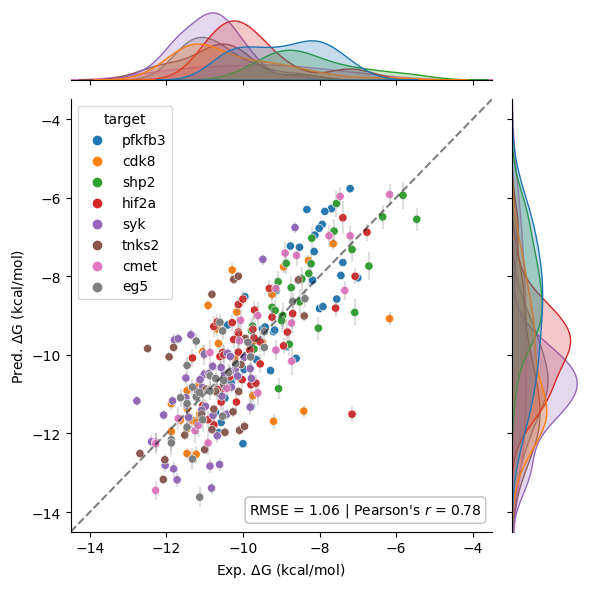

In [61]:
regplot_grouped(data, 'Exp. dG', 'Pred. dG', 'target', 'Pred. Error', outpath='../plots/regplot_grouped.png' )

In [24]:
def distplot(data, x_col, group_col, outpath=None):
    
    plt.subplots(figsize=(5,5))
    sns.kdeplot(data=data, x=x_col, hue=group_col, fill=True, alpha=0.1)
    
    if outpath is not None:
        plt.tight_layout()
        plt.savefig(outpath)

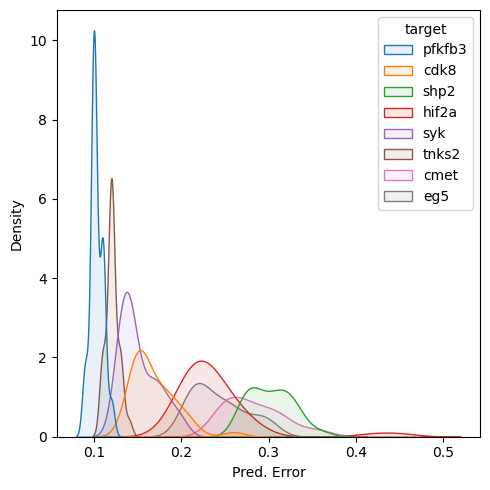

In [25]:
distplot(data, 'Pred. Error', 'target', outpath='../plots/kdeplot_pred_errors.png')

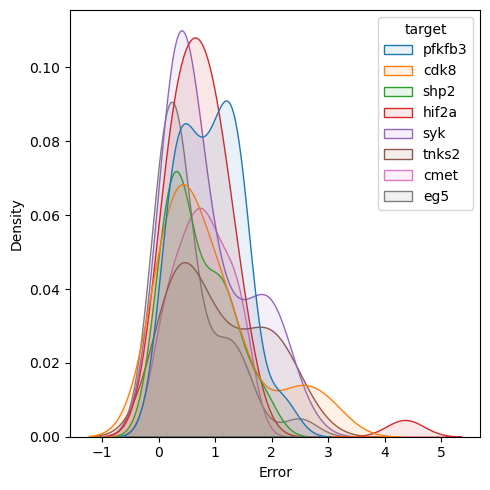

In [27]:
data['Error'] = abs(data['Exp. dG'] - data['Pred. dG'])
distplot(data, 'Error', 'target', outpath='../plots/kdeplot_errors.png')

In [31]:
data.query('Error > 2.0')

,target,target_loc,ligand,ligand_loc,Exp. dG,Pred. dG,Pred. Error,Error
Unnamed: 0,,,,,,,,
pfkfb3_47,pfkfb3,../data/pfkfb3/6hvi_prepared.pdb,47,../data/pfkfb3/pfkfb3_ligand_47.pdb,-8.33,-6.30,0.10,2.03
pfkfb3_37,pfkfb3,../data/pfkfb3/6hvi_prepared.pdb,37,../data/pfkfb3/pfkfb3_ligand_37.pdb,-10.00,-12.26,0.10,2.26
cdk8_28,cdk8,../data/cdk8/5hnb-chainA-prepared.pdb,28,../data/cdk8/cdk8_ligand_28.pdb,-6.17,-9.08,0.16,2.91
cdk8_24,cdk8,../data/cdk8/5hnb-chainA-prepared.pdb,24,../data/cdk8/cdk8_ligand_24.pdb,-10.28,-7.84,0.18,2.44
cdk8_29,cdk8,../data/cdk8/5hnb-chainA-prepared.pdb,29,../data/cdk8/cdk8_ligand_29.pdb,-9.20,-11.69,0.19,2.49
cdk8_18,cdk8,../data/cdk8/5hnb-chainA-prepared.pdb,18,../data/cdk8/cdk8_ligand_18.pdb,-10.91,-8.74,0.14,2.17
cdk8_27,cdk8,../data/cdk8/5hnb-chainA-prepared.pdb,27,../data/cdk8/cdk8_ligand_27.pdb,-8.41,-11.43,0.16,3.02
hif2a_35,hif2a,../data/hif2a/5tbm_prepared.pdb,35,../data/hif2a/hif2a_ligand_35.pdb,-7.15,-11.51,0.21,4.36
syk_CHEMBL3265002,syk,../data/syk/4pv0-prepared.pdb,CHEMBL3265002,../data/syk/syk_ligand_CHEMBL3265002.pdb,-10.61,-12.79,0.17,2.18
